In [1]:
%matplotlib inline

import ipywidgets as w
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
def f(x, p, nb_exp=1, nb_sin=3):
    ip = np.nditer(p)
    return np.sum([next(ip) * np.exp(-np.abs(next(ip)) * x)
                   for i in range(nb_exp)]
                  + [next(ip) * np.sin(next(ip) + (2*np.pi * x) * next(ip))
                     for i in range(nb_sin)] + [next(ip)], axis=0)


def _alphaf(x, p):
        x = x/44100
        return f(x, p, 1, 3)

In [27]:
goal = np.loadtxt('../data/ba_syllable_a_end_ab.dat')

In [28]:
def tune(aexp:float=1, bexp:float=50, asin1:float=1, phsin1:float=0, fsin1:float=80, asin2:float=0.5, phsin2:float=0,
         fsin2:float=200, asin3:float=0.25, phsin3:float=0, fsin3:float=1000, cst:float=6):
    p = np.array([aexp, bexp, asin1, phsin1, fsin1, asin2, phsin2, fsin2, asin3, phsin3, fsin3, cst])
    plt.figure(figsize=(15, 7))
    plt.plot(goal[:, 0])
    plt.plot(_alphaf(np.arange(goal.shape[0]), p))
    plt.ylim((0, 10))
    plt.show()

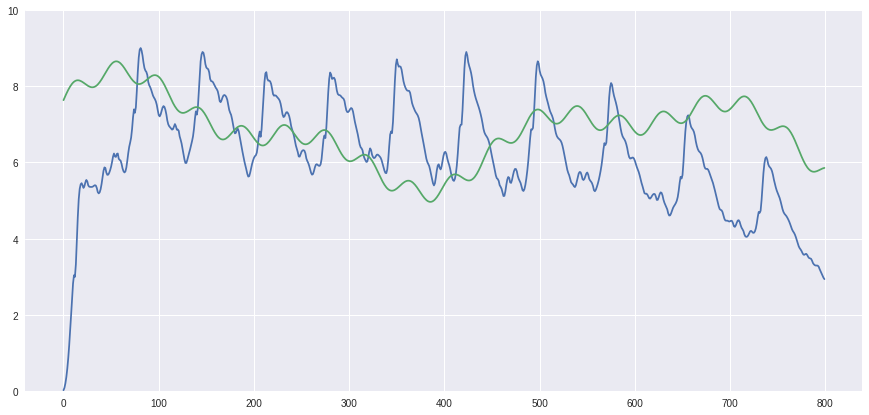

In [29]:
w.interact(tune, aexp=(-10.0, 10.0), bexp=(0.0, 44100.0),
           asin1=(0.0, 10, 0.01), phsin1=(-np.pi, np.pi, 0.001), fsin1=(0, 4000, 10),
           asin2=(0.0, 10, 0.01), phsin2=(-np.pi, np.pi, 0.001), fsin2=(0, 4000, 10),
           asin3=(0.0, 10, 0.01), phsin3=(-np.pi, np.pi, 0.001), fsin3=(0, 4000, 10),
           cst=(0.0, 10.0, 0.1))